In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Pasindu19970808/cancerprediction/master/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
#changing classification to 1,0 binary 
df.loc[df['Classification'] == 1, 'Classification'] = 0
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [8]:
df.loc[df['Classification'] == 2,'Classification'] = 1
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,1
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,1
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,1
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,1
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,1


In [14]:
#variable list 
variable_list = df.columns.tolist()
xdata = df[variable_list[0:-1]]
ydata = df[variable_list[-1]]
xdata.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [15]:
#normalizing data
#numpy array
mean_values = np.mean(xdata, axis = 0)
mean_values

Age             57.301724
BMI             27.582111
Glucose         97.793103
Insulin         10.012086
HOMA             2.694988
Leptin          26.615080
Adiponectin     10.180874
Resistin        14.725966
MCP.1          534.647000
dtype: float64

In [17]:
#standard deviation
std_data = np.std(xdata,axis = 0)
std_data

Age             16.043164
BMI              4.998450
Glucose         22.427860
Insulin         10.024278
HOMA             3.626311
Leptin          19.100428
Adiponectin      6.813780
Resistin        12.337122
MCP.1          344.418433
dtype: float64

In [22]:
scaled_data = (xdata - mean_values)/std_data

In [23]:
type(scaled_data)

pandas.core.frame.DataFrame

In [24]:
#build covariance matrix 
cov_matrix = np.dot(np.transpose(scaled_data),scaled_data)
cov_matrix.shape

(9, 9)

In [27]:
from numpy import linalg as la
eigenval, eigenvec = la.eig(cov_matrix)

In [28]:
eigenval

array([354.79060341, 176.57534344,   3.71446157, 128.26098042,
       135.4350817 ,  33.9443757 ,  51.21985773,  83.8149123 ,
        76.24438372])

In [29]:
eigenvec

array([[-0.12457393, -0.06626166, -0.02879668,  0.82138775,  0.20670086,
         0.12712772,  0.30785182,  0.25297172,  0.29483811],
       [-0.2604297 , -0.49933879,  0.06217806, -0.07092159, -0.4257348 ,
         0.59945409, -0.05332906, -0.23245691,  0.27652419],
       [-0.43902269,  0.18594179, -0.20102285,  0.12561541,  0.13088534,
         0.0844935 , -0.80716167,  0.19951966,  0.03011844],
       [-0.44397869,  0.38631334, -0.61357938, -0.05977182, -0.09371342,
         0.09436728,  0.39056498, -0.29761132, -0.12162117],
       [-0.49285171,  0.37472788,  0.75830133, -0.00564402,  0.01219108,
         0.01629459,  0.13142043, -0.1391521 , -0.06763632],
       [-0.33149346, -0.23364275, -0.03114599,  0.05835395, -0.5832015 ,
        -0.63623826,  0.05409473,  0.28780589,  0.02159401],
       [ 0.17260956,  0.4805981 , -0.00488958, -0.27686688, -0.28212343,
         0.23175112,  0.10252955,  0.52928424,  0.48846279],
       [-0.28174128, -0.30361887, -0.01542451, -0.30270364,  0

In [31]:
#sorted from highest to lowest eigenvalues
idx = eigenval.argsort()[::-1]
idx

array([0, 1, 4, 3, 7, 8, 6, 5, 2], dtype=int64)

In [32]:
#ordered eigenvalues
eigenval = eigenval[idx]
eigenval

array([354.79060341, 176.57534344, 135.4350817 , 128.26098042,
        83.8149123 ,  76.24438372,  51.21985773,  33.9443757 ,
         3.71446157])

In [33]:
#ordered eigenvectors
eigenvec = eigenvec[idx]
eigenvec

array([[-0.12457393, -0.06626166, -0.02879668,  0.82138775,  0.20670086,
         0.12712772,  0.30785182,  0.25297172,  0.29483811],
       [-0.2604297 , -0.49933879,  0.06217806, -0.07092159, -0.4257348 ,
         0.59945409, -0.05332906, -0.23245691,  0.27652419],
       [-0.49285171,  0.37472788,  0.75830133, -0.00564402,  0.01219108,
         0.01629459,  0.13142043, -0.1391521 , -0.06763632],
       [-0.44397869,  0.38631334, -0.61357938, -0.05977182, -0.09371342,
         0.09436728,  0.39056498, -0.29761132, -0.12162117],
       [-0.28174128, -0.30361887, -0.01542451, -0.30270364,  0.28892346,
         0.24326258,  0.24436211,  0.59759607, -0.42081192],
       [-0.25463066, -0.2104494 , -0.04649724, -0.35946987,  0.49675794,
        -0.30083068,  0.08893578, -0.11887004,  0.63260295],
       [ 0.17260956,  0.4805981 , -0.00488958, -0.27686688, -0.28212343,
         0.23175112,  0.10252955,  0.52928424,  0.48846279],
       [-0.33149346, -0.23364275, -0.03114599,  0.05835395, -0

In [37]:
#total variance % 
totalsingularval = np.sum(eigenval,axis = 0)
eigenvalpercent = (eigenval/totalsingularval)*100
eigenvalpercent

array([33.98377427, 16.91334707, 12.97270898, 12.28553452,  8.0282483 ,
        7.30310189,  4.90611664,  3.25137698,  0.35579134])

In [38]:
eigenvalpercent.shape

(9,)

In [41]:
labels = [('PC' + (str(i + 1))) for i in range(0,eigenvalpercent.shape[0])] 
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

Text(0, 0.5, '% Variance')

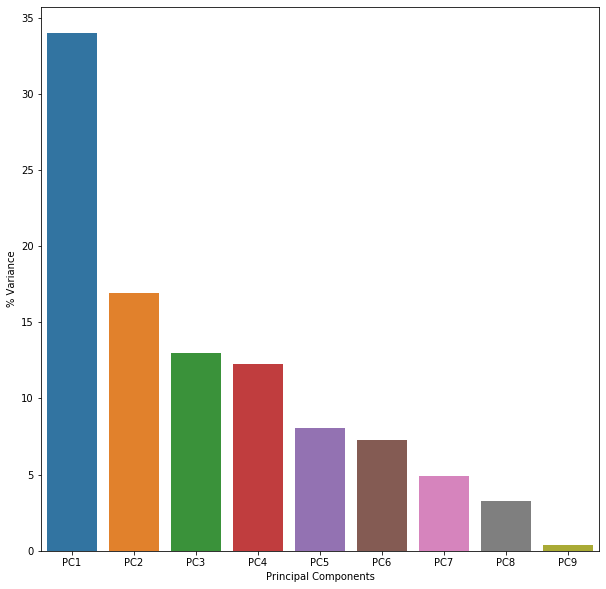

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
sns.barplot(x = labels, y = eigenvalpercent,ax = ax1)

ax1.set_xlabel('Principal Components')
ax1.set_ylabel('% Variance')


In [54]:
#calculating the cumulative variance to capture 90% variance
cumulative_variance = list()
[cumulative_variance.append(sum(eigenvalpercent[0:i + 1:1])) for i in range(0,eigenvalpercent.shape[0])]
cumulative_variance

[33.98377427322261,
 50.89712134580022,
 63.86983032133121,
 76.15536484409762,
 84.1836131488559,
 91.48671503811055,
 96.39283167853155,
 99.6442086614377,
 100.0]

Text(0, 0.5, 'Cumulative Variance')

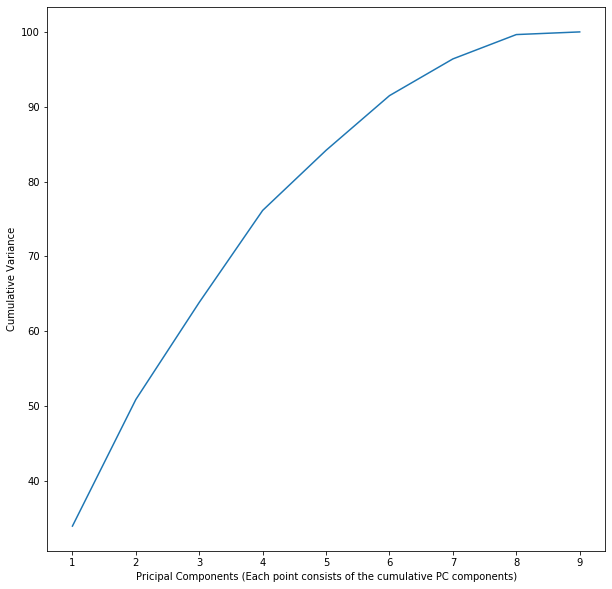

In [56]:
#drawing a cumulative variance graph
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111)
sns.lineplot(x = [i + 1 for i in range(0,eigenvalpercent.shape[0])], y = cumulative_variance, markers = True, ax = ax2)

ax2.set_xlabel('Pricipal Components (Each point consists of the cumulative PC components)')
ax2.set_ylabel('Cumulative Variance')

In [57]:
#the variance from the first 2 principal components presents only 51% of the entire variance. Hence it is not sufficient
#to reduce the number of dimensions to a 2 dimensional space. Nevertheless, we can visualize how the data is presented
#when we use 2 PCs

PC = eigenvec[0:2]
PC

array([[-0.12457393, -0.06626166, -0.02879668,  0.82138775,  0.20670086,
         0.12712772,  0.30785182,  0.25297172,  0.29483811],
       [-0.2604297 , -0.49933879,  0.06217806, -0.07092159, -0.4257348 ,
         0.59945409, -0.05332906, -0.23245691,  0.27652419]])

In [59]:
np.transpose(PC).shape

(9, 2)

In [61]:
#projecting x data onto principal components
transformeddata = np.dot(scaled_data,np.transpose(PC))
transformeddata.shape

(116, 2)

In [63]:
transformeddataframe = pd.DataFrame(data = transformeddata, columns = ['PC1','PC2'],\
                                    index = list(range(0,transformeddata.shape[0])))
transformeddataframe['Classification'] = ydata
transformeddataframe.head()

,PC1,PC2,Classification
0,-0.942281,0.272244,0
1,-1.387180,0.164907,0
2,-0.270647,0.013000,0
3,-0.599423,0.533343,0
4,-1.021967,0.119308,0


Text(0, 0.5, 'PC2')

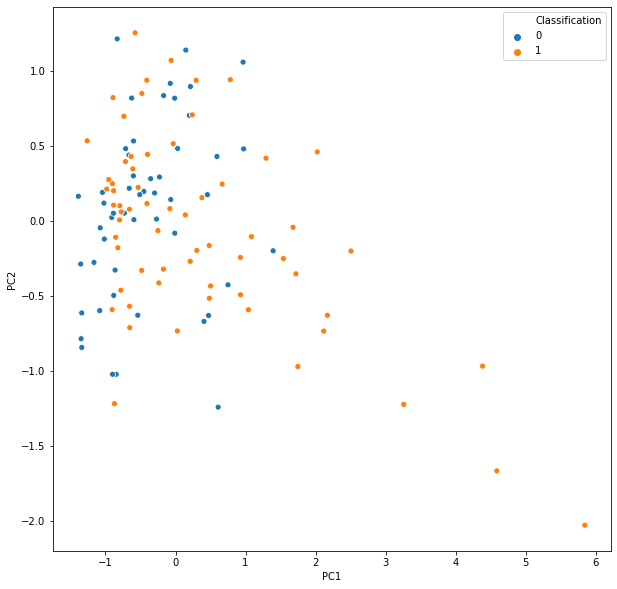

In [65]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Classification', data = transformeddataframe)

ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')

In [66]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0